# Partie TP 

Exercice 3:

Tableau avant tri : [73, 44, 59, 51, 63, 32, 80, 74, 53, 85]
Tableau après tri : [32, 44, 51, 53, 59, 63, 73, 74, 80, 85]


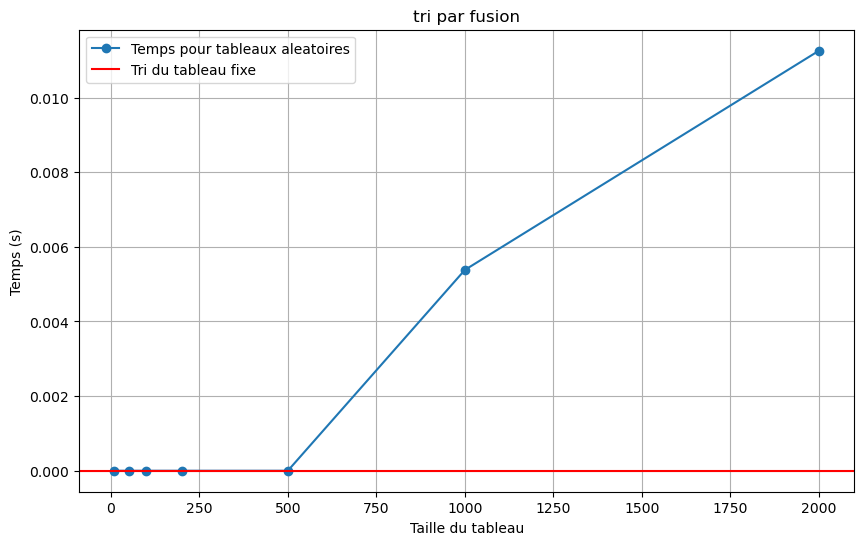

In [6]:
import time
import random
import matplotlib.pyplot as plt

# Fonction pour fusionner 2 sous-parties du tableau
def fusionner(a, lo, mid, hi):
    aux = [0] * (hi - lo)
    i, j = lo, mid
    for k in range(hi - lo):
        if i == mid:  
            aux[k] = a[j]
            j += 1
        elif j == hi:  
            aux[k] = a[i]
            i += 1
        elif a[i] > a[j]:  
            aux[k] = a[j]
            j += 1
        else:
            aux[k] = a[i]
            i += 1
    for k in range(hi - lo):
        a[lo + k] = aux[k]

# Fonction de tri par fusion
def tri_fusion(a, lo, hi):
    if hi - lo <= 1:  
        return
    mid = lo + (hi - lo) // 2
    tri_fusion(a, lo, mid)  
    tri_fusion(a, mid, hi)  
    fusionner(a, lo, mid, hi)  

# Tableau donné
tableau_fixe = [73, 44, 59, 51, 63, 32, 80, 74, 53, 85]


print("Tableau avant tri :", tableau_fixe)
tri_fusion(tableau_fixe, 0, len(tableau_fixe))
print("Tableau après tri :", tableau_fixe)

# Fonction pour mesurer le temps d'exécution
def mesurer_temps(n):
    tableau = [random.randint(0, 100) for _ in range(n)]  
    debut = time.time()
    tri_fusion(tableau, 0, len(tableau))  
    fin = time.time()
    return fin - debut


tailles = [10, 50, 100, 200, 500, 1000, 2000]
temps_execution = [mesurer_temps(n) for n in tailles]

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(tailles, temps_execution, marker='o', label="Temps pour tableaux aleatoires")
plt.axhline(y=0, color='r', label="Tri du tableau fixe")
plt.xlabel("Taille du tableau")
plt.ylabel("Temps (s)")
plt.title("tri par fusion")
plt.grid(True)
plt.legend()
plt.show()


Exercice 4:

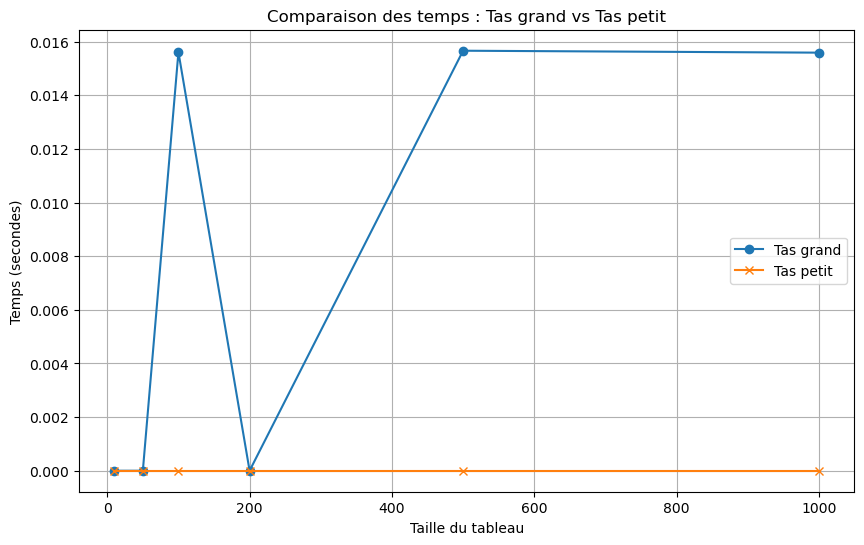

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def changer(x, y):
    return y, x

def ajoutTasGrand(A, size, val): #Ajouter un element + keep the property
    A[size] = val
    f = size
    p = (f - 1) // 2
    while p >= 0 and A[p] < A[f]:
        A[p], A[f] = changer(A[p], A[f])
        f = p
        p = (f - 1) // 2

def ajoutTasPetit(A, size, val): #Ajouter un element + keep the property
    A[size] = val
    f = size
    p = (f - 1) // 2
    while p >= 0 and A[p] > A[f]:  
        A[p], A[f] = changer(A[p], A[f])
        f = p
        p = (f - 1) // 2

def creerTasGrand(A, s):
    for i in range(s):
        ajoutTasGrand(A, i, A[i])

def creerTasPetit(A, s):
    for i in range(s):
        ajoutTasPetit(A, i, A[i])

def triTasGrand(A):
    n = len(A)
    creerTasGrand(A, n)
    for i in range(n - 1, 0, -1):
        A[0], A[i] = changer(A[0], A[i])
        ajusterGrand(A, 0, i)

def triTasPetit(A):
    n = len(A)
    creerTasPetit(A, n)
    for i in range(n - 1, 0, -1):
        A[0], A[i] = changer(A[0], A[i])
        ajusterPetit(A, 0, i)

def ajusterGrand(A, d, taille):
    p = d
    while 2 * p + 1 < taille:
        f = 2 * p + 1
        if f + 1 < taille and A[f + 1] > A[f]: 
            f += 1
        if A[p] < A[f]:  
            A[p], A[f] = changer(A[p], A[f])
            p = f
        else:
            break

def ajusterPetit(A, d, taille):
    p = d
    while 2 * p + 1 < taille:
        f = 2 * p + 1
        if f + 1 < taille and A[f + 1] < A[f]:  
            f += 1
        if A[p] > A[f]:  
            A[p], A[f] = changer(A[p], A[f])
            p = f
        else:
            break

# Mesurer les temps pour les deux méthodes
def calculerTemps(A, type_tas):
    B = A.copy()
    debut = time.time()
    if type_tas == "grand":
        triTasGrand(B)
    elif type_tas == "petit":
        triTasPetit(B)
    fin = time.time()
    return fin - debut

# Comparaison entre tas grand et tas petit
tailles = [10, 50, 100, 200, 500, 1000]
temps_grand = []
temps_petit = []

for t in tailles:
    tableau = [random.randint(0, 10000) for _ in range(t)]
    temps_grand.append(calculerTemps(tableau, "grand"))
    temps_petit.append(calculerTemps(tableau, "petit"))

plt.figure(figsize=(10, 6))
plt.plot(tailles, temps_grand, label="Tas grand", marker='o')
plt.plot(tailles, temps_petit, label="Tas petit", marker='x')
plt.xlabel("Taille du tableau")
plt.ylabel("Temps (secondes)")
plt.title("Comparaison des temps : Tas grand vs Tas petit")
plt.legend()
plt.grid()
plt.show()
